In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t,f
from scipy import stats
import statsmodels.api as sm

In [28]:
df = pd.read_csv('MROZ.txt', delim_whitespace=True, header = None)
indexNames = df[ df[6] == '.' ].index # get names of indexes for which column wage has value of '.' 
df.drop(indexNames , inplace=True) # delete these row indexes from dataFrame
df = df.astype(float) # transform to float



Q1

Nous sélectionnons seulement les lignes pour lesquelles le salaire est défini et non nul. Ceci grâce à la commande .loc

In [29]:
i,j = df.shape
print('Taille:', i, j)

df = df.loc[df[6] > 0]

k,m=df.shape
print('Taille pour les salaires strictement positifs >0:',k,m)
df

Taille: 428 22
Taille pour les salaires strictement positifs >0: 428 22


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.0,1610.0,1.0,0.0,32.0,12.0,3.3540,2.65,2708.0,34.0,...,16310.0,0.7215,12.0,7.0,5.0,0.0,14.0,10.910060,1.210154,196.0
1,1.0,1656.0,0.0,2.0,30.0,12.0,1.3889,2.65,2310.0,30.0,...,21800.0,0.6615,7.0,7.0,11.0,1.0,5.0,19.499980,0.328512,25.0
2,1.0,1980.0,1.0,3.0,35.0,12.0,4.5455,4.04,3072.0,40.0,...,21040.0,0.6915,12.0,7.0,5.0,0.0,15.0,12.039910,1.514138,225.0
3,1.0,456.0,0.0,3.0,34.0,12.0,1.0965,3.25,1920.0,53.0,...,7300.0,0.7815,7.0,7.0,5.0,0.0,6.0,6.799996,0.092123,36.0
4,1.0,1568.0,1.0,2.0,31.0,14.0,4.5918,3.60,2000.0,32.0,...,27300.0,0.6215,12.0,14.0,9.5,1.0,7.0,20.100060,1.524272,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,1.0,680.0,0.0,5.0,36.0,10.0,2.3118,0.00,3430.0,43.0,...,19772.0,0.7215,7.0,7.0,7.5,0.0,2.0,18.199980,0.838027,4.0
424,1.0,2450.0,0.0,1.0,40.0,12.0,5.3061,6.50,2008.0,40.0,...,35641.0,0.6215,7.0,7.0,5.0,1.0,21.0,22.641060,1.668857,441.0
425,1.0,2144.0,0.0,2.0,43.0,13.0,5.8675,0.00,2140.0,43.0,...,34220.0,0.5815,7.0,7.0,7.5,1.0,22.0,21.640080,1.769429,484.0
426,1.0,1760.0,0.0,1.0,33.0,12.0,3.4091,3.21,3380.0,34.0,...,30000.0,0.5815,12.0,16.0,11.0,1.0,14.0,23.999980,1.226448,196.0


In [30]:
print(df)

      0       1    2    3     4     5       6     7       8     9   ...  \
0    1.0  1610.0  1.0  0.0  32.0  12.0  3.3540  2.65  2708.0  34.0  ...   
1    1.0  1656.0  0.0  2.0  30.0  12.0  1.3889  2.65  2310.0  30.0  ...   
2    1.0  1980.0  1.0  3.0  35.0  12.0  4.5455  4.04  3072.0  40.0  ...   
3    1.0   456.0  0.0  3.0  34.0  12.0  1.0965  3.25  1920.0  53.0  ...   
4    1.0  1568.0  1.0  2.0  31.0  14.0  4.5918  3.60  2000.0  32.0  ...   
..   ...     ...  ...  ...   ...   ...     ...   ...     ...   ...  ...   
423  1.0   680.0  0.0  5.0  36.0  10.0  2.3118  0.00  3430.0  43.0  ...   
424  1.0  2450.0  0.0  1.0  40.0  12.0  5.3061  6.50  2008.0  40.0  ...   
425  1.0  2144.0  0.0  2.0  43.0  13.0  5.8675  0.00  2140.0  43.0  ...   
426  1.0  1760.0  0.0  1.0  33.0  12.0  3.4091  3.21  3380.0  34.0  ...   
427  1.0   490.0  0.0  1.0  30.0  12.0  4.0816  2.46  2430.0  33.0  ...   

          12      13    14    15    16   17    18         19        20     21  
0    16310.0  0.721

**Q2**

Pour l'ensemble des femmes:

In [31]:

print('Wage:')
wage=df[6]
wage.describe()


Wage:


count    428.000000
mean       4.177682
std        3.310282
min        0.128200
25%        2.262600
50%        3.481900
75%        4.970750
max       25.000000
Name: 6, dtype: float64

Pour les femmes dont le salaire du mari est supérieur à la médiane:

In [32]:
# Pour les femmes dont le salaire du mari est supérieur à la médiane
median = np.median(df[11]) #mediane
wage2 = df[11].loc[df[11] >= median] #selectionne les femmes
wage2.describe()

count    214.000000
mean       9.833896
std        3.134101
min        6.687200
25%        7.569925
50%        8.840450
75%       11.262250
max       26.578000
Name: 11, dtype: float64

Pour les femmes dont le salaire du mari est inférieur à la médiane:

In [33]:
# Pour les femmes dont le salaire du mari est inférieur à la médiane
wage3 = df[11].loc[df[11] <= median]  
wage3.describe()

count    214.000000
mean       4.618557
std        1.442478
min        0.512800
25%        3.764875
50%        4.810600
75%        5.820600
max        6.679000
Name: 11, dtype: float64

**Q3**

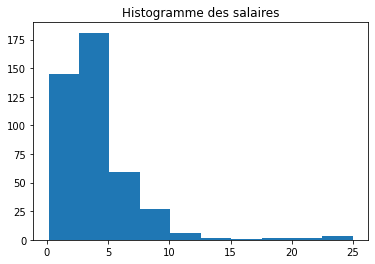

In [34]:
plt.hist(wage)
plt.title('Histogramme des salaires')
plt.show()

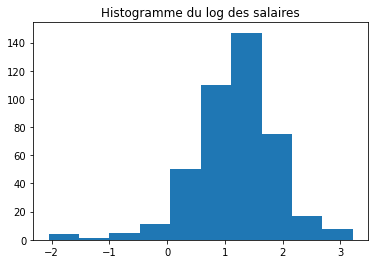

'Le premier histogramme ressemble à une distribution exponentielle. La variable log(wage) suit une loi gaussienne, centrée autour de 1 environ mais dont la variance n est pas réduit'

In [35]:
y=np.log(wage)
plt.hist(y)
plt.title('Histogramme du log des salaires')
plt.show()


'Le premier histogramme ressemble à une distribution exponentielle. La variable log(wage) suit une loi gaussienne, centrée autour de 1 environ mais dont la variance n est pas réduit'


In [36]:


Mo = df[14] #motheduc 
Fa = df[15] #fatheduc
print('corrélation motheduc wage', Mo.corr(wage))
print('corrélation fatheduc wage',Fa.corr(wage))
print('corrélation motheduc fatheduc',Mo.corr(Fa))



corrélation motheduc wage 0.05707416439783269
corrélation fatheduc wage 0.10773624582184281
corrélation motheduc fatheduc 0.5540632184311677


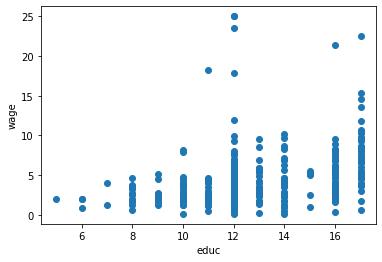

In [37]:
#Q5 

#Entre educ et wage
educ=df[5]
plt.scatter(educ,wage)
plt.xlabel("educ")
plt.ylabel("wage")
plt.show()

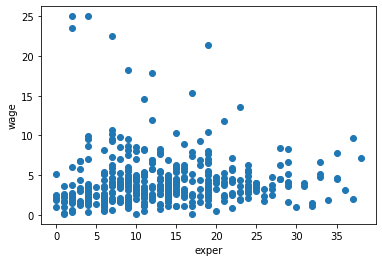

In [38]:
#entre wage et exper
exper=df[18]
plt.scatter(exper,wage)
plt.xlabel("exper")
plt.ylabel("wage")
plt.show()

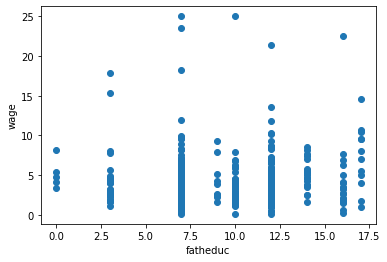

'Pour chaque graphique, les autres variables varie également. Par exemple, pour le dernier graphique, l éducation varient en même temps que l éducation du père. Il ne s agit pas d un effet toutes choses sont égales par ailleurs.'

In [39]:
#entre wage et fatheduc
exper=df[15]
plt.scatter(exper,wage)
plt.xlabel("fatheduc")
plt.ylabel("wage")
plt.show()

'Pour chaque graphique, les autres variables varie également. Par exemple, pour le dernier graphique, l éducation varient en même temps que l éducation du père. Il ne s agit pas d un effet toutes choses sont égales par ailleurs.'





In [40]:
#Q6

'hypothèse fondamentale : E(u|x)=0'

'hypothèse fondamentale : E(u|x)=0'

variance 9.54162046810813


'La variance est grande et la repartition des valeurs est dissymétrique autour de 0: ca ne semble pas être pas une loi centrée reduite'

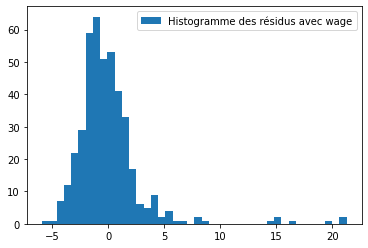

In [41]:
#Q7

wage = df[6]
const = np.ones(np.shape(wage))
exper = df[18]
city = df[17]
educ = df[5]
nwifeinc = df[19]
kidslt6 = df[2]
kidsgt6 = df[3]
X7 = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kidsgt6))
model = sm.OLS(wage, X7)
model_fit = model.fit()
residus = model_fit.resid

plt.figure(5)
plt.hist(residus,'auto', label='Histogramme des résidus avec wage')
plt.legend()
print('variance',np.var(residus))

'La variance est grande et la repartition des valeurs est dissymétrique autour de 0: ca ne semble pas être pas une loi centrée reduite'



                            OLS Regression Results                            
Dep. Variable:                      6   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Sun, 21 Nov 2021   Prob (F-statistic):           2.00e-13
Time:                        23:06:45   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.207     -1.927      0.0

'La variance est plus proche de 1, et la répartition des valeurs est plus ou moins symétrique autour de 0: avec le logarithme des salaires, les résidus se rappochent d une loi gaussienne centrée réduite.'

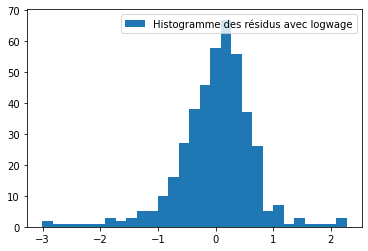

In [42]:
#Q8
 
logwage = np.log(wage)
X = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kidsgt6))
model_2 = sm.OLS(logwage, X)
model_fit_2 = model_2.fit()
residus_2 = model_fit_2.resid
SSR1=residus_2.T@residus_2
print(model_fit_2.summary())
plt.figure(5)
plt.hist(residus_2,'auto', label='Histogramme des résidus avec logwage')
plt.legend()
print(np.var(residus_2))
'La variance est plus proche de 1, et la répartition des valeurs est plus ou moins symétrique autour de 0: avec le logarithme des salaires, les résidus se rappochent d une loi gaussienne centrée réduite.'


In [43]:
#Q9



from scipy.stats import norm
#extract std error and coef
std = model_fit_2.bse
coef = model_fit_2.params


p_values = norm.cdf(-1*abs(coef/std))*2

print('Hypothèse nulle H0: X4 = 0')
print('P-value de nwifeinc: ', p_values[4], '\n')

def rejet_hyp():
    print('Rejet de HO avec seuil de significativité à 1% :', p_values[4] < 0.01)
    print('Rejet de HO avec seuil de significativité à 5% :', p_values[4] < 0.05)
    print('Rejet de HO avec seuil de significativité à 10% :', p_values[4] < 0.1)
    
rejet_hyp()

Hypothèse nulle H0: X4 = 0
P-value de nwifeinc:  0.14266143440889434 

Rejet de HO avec seuil de significativité à 1% : False
Rejet de HO avec seuil de significativité à 5% : False
Rejet de HO avec seuil de significativité à 10% : False


In [44]:
#10


p_value_2 = norm.cdf(-1*abs((coef[4]-0.01)/ std[4]))*2


print('Hypothèse nulle H0: X4 = 0.01')
print('P-value de nwifeinc: ', p_value_2, '\n')

print('Rejet de Ho avec un seuil de significativité à 5%: ', p_value_2 < 0.05)

Hypothèse nulle H0: X4 = 0.01
P-value de nwifeinc:  0.12444305576562575 

Rejet de Ho avec un seuil de significativité à 5%:  False


In [45]:
#Q11

X11 = np.column_stack((const, exper, educ, kidslt6, kidsgt6))
Y11 = np.log(wage)-0.01*nwifeinc - 0.05*city
model_11 = sm.OLS(Y11,X11)
res_11 = model_11.fit()
u = res_11.resid
SSR11 = u.T@u
print(SSR11)
n,k = np.shape(X7)
F11 =((SSR11 - SSR1)/SSR1)*(n-k)/2
print(F11)
Fisher11 = f.sf(F11,2,n-k)
print("La p-valeur vaut : ", Fisher11)
print('D après le test de Fisher, on ne rejette pas l hypothèse nulle à 5%')

189.78787351329754
1.3370701154055398
La p-valeur vaut :  0.26372680012868377
D après le test de Fisher, on ne rejette pas l hypothèse nulle à 5%


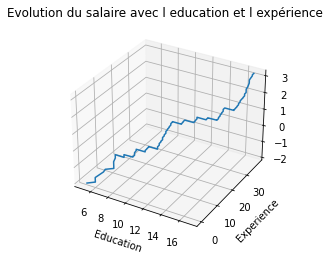

In [46]:
#Q12
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = plt.axes(projection='3d')
X = np.sort(educ)
Y = np.sort(exper)
Z = np.sort(np.log(wage))
ax.plot3D(X,Y,Z)
plt.title('Evolution du salaire avec l education et l expérience ') 
plt.xlabel('Education')
plt.ylabel('Experience')
plt.show()

In [47]:
#13

kids = kidslt6.add(kidsgt6)
X_13 = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kids))
Y_13 = np.log(wage)
model_13 = sm.OLS(Y_13, X_13)
res_13 = model_13.fit()
print(res_13.summary())

print('On observe une p-value de 71% pour kidsgt6, ce qui est supérieur à 5%: nous ne rejettons pas l hypothèse à 5%')

                            OLS Regression Results                            
Dep. Variable:                      6   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Sun, 21 Nov 2021   Prob (F-statistic):           2.00e-13
Time:                        23:06:46   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.207     -1.927      0.0

In [48]:
#Q14


logwage = np.log(wage)
X_14 = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kidsgt6))
model_14 = sm.OLS(wage, X_14)
model_fit_14 = model_14.fit()
residus_14 = model_fit_14.resid





Y_14 = residus_14**2 


model_14_2 = sm.OLS(Y_14, X_14)
result_14_2 = model_14_2.fit()

H = result_14_2.rsquared

print(result_14_2.summary())

n,k = np.shape(X_14)
F4 = (H/k) / ((1-H) / (n-k-1))
p_values_14 = result_14_2.f_pvalue
print('F vaut  ', result_14_2.fvalue)
print('La p-value vaut', result_14_2.f_pvalue)
print('conclusion: on rejette le test d hétéroscédasticité à 5%')





                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.593
Date:                Sun, 21 Nov 2021   Prob (F-statistic):              0.148
Time:                        23:06:46   Log-Likelihood:                -2207.4
No. Observations:                 428   AIC:                             4429.
Df Residuals:                     421   BIC:                             4457.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4856     13.111      0.113      0.9

In [50]:
#15

df_plus43 = df.loc[df[4] >= 43] #femmes de plus de 43 ans, puis on prend les données de df_plus43
wage_plus43 = df_plus43[6]
const_plus43 = np.ones(np.shape(wage_plus43))
exper_plus43 = df_plus43[18]
city_plus43 = df_plus43[17]
educ_plus43 = df_plus43[5]
nwifeinc_plus43 = df_plus43[19]
kidslt6_plus43 = df_plus43[2]
kidsgt6_plus43 = df_plus43[3]
lwage_plus43 = np.log(wage_plus43)
X_plus43 = np.column_stack((const_plus43, city_plus43, educ_plus43, exper_plus43, nwifeinc_plus43, kidslt6_plus43, kidsgt6_plus43))
model_plus43 = sm.OLS(lwage_plus43, X_plus43)
model_fit_plus43 = model_plus43.fit()
residus_plus43 = model_fit_plus43.resid

df_moins43 = df.loc[df[4] < 43] #femmes de plus de 43 ans, puis on prend les données de df_plus43
wage_moins43 = df_moins43[6]
const_moins43 = np.ones(np.shape(wage_moins43))
exper_moins43 = df_moins43[18]
city_moins43 = df_moins43[17]
educ_moins43 = df_moins43[5]
nwifeinc_moins43 = df_moins43[19]
kidslt6_moins43 = df_moins43[2]
kidsgt6_moins43 = df_moins43[3]
lwage_moins43 = np.log(wage_moins43)
X_moins43 = np.column_stack((const_moins43, city_moins43, educ_moins43, exper_moins43, nwifeinc_moins43, kidslt6_moins43, kidsgt6_moins43))
model_moins43 = sm.OLS(lwage_moins43, X_moins43)
model_fit_moins43 = model_moins43.fit()
residus_moins43 = model_fit_moins43.resid

SSR_plus43 = residus_plus43.T@residus_plus43
SSR_moins43 = residus_moins43.T@residus_moins43

X = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kidsgt6))

n,k = np.shape(X)
print(n)
print(k)
F_15 = ((SSR1 - (SSR_plus43+SSR_moins43))/(SSR_plus43+SSR_moins43))*(n-2*k)/7
print('SSR1',SSR1)
print('SSR_plus43', SSR_plus43)
print('SSR_moins43',SSR_moins43)
print('F_15',F_15)
Fisher15 = f.sf(F_15,7,n-2*k)

print("La p-valeur vaut : ",Fisher15)
print('Conclusion: La p-value est supérieure à 5%. Pas de rejet de l hypothèse nulle et pas de changement de structure à 43 ans.')







428
7
SSR1 188.5899731939495
SSR_plus43 80.40364431941241
SSR_moins43 104.4816493557776
F_15 1.1850879384868205
La p-valeur vaut :  0.3099731564088487
Conclusion: La p-value est supérieure à 5%. Pas de rejet de l hypothèse nulle et pas de changement de structure à 43 ans.
